### Importing libraries and datasets

In [1]:
import urllib.request 
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
response = urllib.request.urlopen('https://www.python.org')
# print(response.read().decode('utf-8'))

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
target_train = train['target']

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.shape

(7613, 5)

In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
test.shape

(3263, 4)

In [7]:
target_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Preliminar visualization of the datasets

Let us count the target values and visualize the relationship between words and traget values. Then will know which words are more related with disasters and which not.

/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


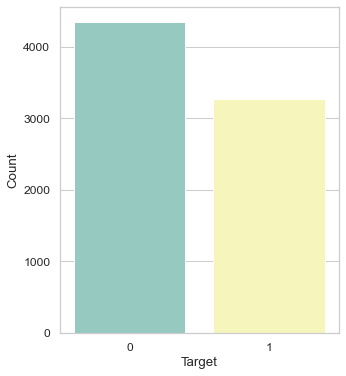

In [8]:
target_df=target_train.to_frame(name='target')
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [5, 6]})
sns.countplot(target_df['target'],color='r',palette="Set3").set(xlabel='Target', ylabel='Count');

The dataset is inbalanced. This can be fixed merging both train and test datasets.

In [9]:
# Merging train and test data
merge_data = pd.concat([train.drop(['target'], axis=1), test])
merge_data.head()

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [10]:
merge_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [11]:
# Remove null values in "keyword" column
merge_data = merge_data[pd.notnull(merge_data["keyword"])]
merge_data.isnull().sum()

id             0
keyword        0
location    3551
text           0
dtype: int64

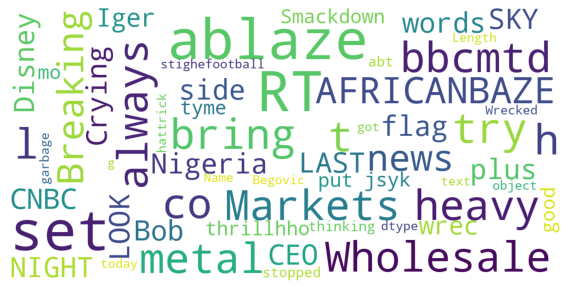

In [12]:
# Text Visualization
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(merge_data["text"])

### Filtering Stop Words

In [13]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

# Non-alphanumeric & non printable characters
merge_data["text"] = merge_data["text"].replace(r"[^a-zA-Z0-9]", '', regex=True)

# E-mail address
merge_data["text"]=merge_data["text"].replace(r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|'(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*')@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])", ' ',regex=True)

#Numeric characters
merge_data["text"]=merge_data["text"].replace(r"[.+\d. +]", ' ',regex=True)

#URLs
merge_data["text"]=merge_data["text"].replace(r"/(?:(?:https?|ftp|file):\/\/|www\.|ftp\.)(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[-A-Z0-9+&@#\/%=~_|$?!:,.])*(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[A-Z0-9+&@#\/%=~_|$])/igm", ' ',regex=True)

# Convert all characters to lowercase
merge_data["text"] = merge_data["text"].str.lower()

# Removing stop words
merge_data["text"] = merge_data["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Multiple whitespaces to one
merge_data["text"]=merge_data["text"].str.strip()

merge_data

/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/xavier/snap/jupyter/6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text
31,48,ablaze,Birmingham,bbcmtdwholesalemarketsablazehttptcolhyxeohy c
32,49,ablaze,Est. September 2012 - Bristol,wealwaystrytobringtheheavymetalrthttptcoyao e ...
33,50,ablaze,AFRICA,africanbazebreakingnewsnigeriaflagsetablazeina...
34,52,ablaze,"Philadelphia, PA",cryingoutformoresetmeablaze
35,53,ablaze,"London, UK",onplussidelookattheskylastnightitwasablazehttp...
...,...,...,...,...
3247,10806,wrecked,Seattle Washington,rtcnbc wordsfromdisneyceobobigerwreckeddisneys...
3248,10807,wrecked,Acey mountain islanddåÇTorontoåÈ,smackdowntymethisshouldputmeinagoodmoodagainsi...
3249,10816,wrecked,los angeles,thrillhhojsykihaventstoppedthinkingabtremusslu...
3250,10820,wrecked,"Brussels, Belgium",stighefootballbegovichasbeengarbagehegotwrecke...


In [14]:
# Unique text in "keyword" column
merge_data["keyword"].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

### Encoding text data

In [15]:
#merge_data = merge_data.drop(['id'], axis=1)
merge_data = merge_data.drop(['location'], axis=1)

from category_encoders import BinaryEncoder

be = BinaryEncoder(cols=['keyword'])
newcolumns = be.fit_transform(merge_data['keyword'])
merge_data = pd.concat([merge_data,newcolumns], axis=1)
merge_data

/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,id,keyword,text,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8
31,48,ablaze,bbcmtdwholesalemarketsablazehttptcolhyxeohy c,0,0,0,0,0,0,0,0,1
32,49,ablaze,wealwaystrytobringtheheavymetalrthttptcoyao e ...,0,0,0,0,0,0,0,0,1
33,50,ablaze,africanbazebreakingnewsnigeriaflagsetablazeina...,0,0,0,0,0,0,0,0,1
34,52,ablaze,cryingoutformoresetmeablaze,0,0,0,0,0,0,0,0,1
35,53,ablaze,onplussidelookattheskylastnightitwasablazehttp...,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3247,10806,wrecked,rtcnbc wordsfromdisneyceobobigerwreckeddisneys...,0,1,1,0,1,1,1,0,1
3248,10807,wrecked,smackdowntymethisshouldputmeinagoodmoodagainsi...,0,1,1,0,1,1,1,0,1
3249,10816,wrecked,thrillhhojsykihaventstoppedthinkingabtremusslu...,0,1,1,0,1,1,1,0,1
3250,10820,wrecked,stighefootballbegovichasbeengarbagehegotwrecke...,0,1,1,0,1,1,1,0,1


In [16]:
merge_data = merge_data.drop(['keyword'], axis=1)

In [17]:
merge_data.columns

Index(['id', 'text', 'keyword_0', 'keyword_1', 'keyword_2', 'keyword_3',
       'keyword_4', 'keyword_5', 'keyword_6', 'keyword_7', 'keyword_8'],
      dtype='object')

In [18]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10789 entries, 31 to 3251
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10789 non-null  int64 
 1   text       10789 non-null  object
 2   keyword_0  10789 non-null  int64 
 3   keyword_1  10789 non-null  int64 
 4   keyword_2  10789 non-null  int64 
 5   keyword_3  10789 non-null  int64 
 6   keyword_4  10789 non-null  int64 
 7   keyword_5  10789 non-null  int64 
 8   keyword_6  10789 non-null  int64 
 9   keyword_7  10789 non-null  int64 
 10  keyword_8  10789 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1011.5+ KB


### TF-IDF
Measuring text groups by frequency TF (Term Frequency) and by importance with IDF (Inverse Document Frequency)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
tfidf_result = tfidf.fit_transform(merge_data["text"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = merge_data.index
merge_data = pd.concat([merge_data, tfidf_df], axis=1)

In [20]:
merge_data.head()

,id,text,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,...,word_yx,word_za,word_zjin,word_zl,word_zo,word_ztaxiwaysfoxtrot,word_zu,word_zw,word_zx,word_zy
31,48,bbcmtdwholesalemarketsablazehttptcolhyxeohy c,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,49,wealwaystrytobringtheheavymetalrthttptcoyao e ...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,50,africanbazebreakingnewsnigeriaflagsetablazeina...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,52,cryingoutformoresetmeablaze,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,53,onplussidelookattheskylastnightitwasablazehttp...,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
merge_data.columns

Index(['id', 'text', 'keyword_0', 'keyword_1', 'keyword_2', 'keyword_3',
       'keyword_4', 'keyword_5', 'keyword_6', 'keyword_7',
       ...
       'word_yx', 'word_za', 'word_zjin', 'word_zl', 'word_zo',
       'word_ztaxiwaysfoxtrot', 'word_zu', 'word_zw', 'word_zx', 'word_zy'],
      dtype='object', length=1011)

In [22]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10789 entries, 31 to 3251
Columns: 1011 entries, id to word_zy
dtypes: float64(1000), int64(10), object(1)
memory usage: 83.3+ MB


### Resampling the inbalance dataset using SMOT ( Synthetic Minority Oversampling Technique)

In [23]:
### Resampling the dataset to balance it 
# Using SMOT
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=1,
                          n_clusters_per_class=1, class_sep=0.9)
X.shape

(10000, 2)

In [24]:
y.shape

(10000,)

In [25]:
# test_size = 0.3263 to match with sample_submission.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3263, random_state=42, stratify=y)
X_train.shape
y_test.shape

(3263,)

In [26]:
from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
print('After over-sampling:\n')
print('The shape of train_X: {}'.format(X_train.shape)) 
print('The shape of train_y: {}'.format(y_train.shape)) 
  
print("Counts of label '1': {}".format(sum(y_train == 1))) 
print("Counts of label '0': {}".format(sum(y_train == 0)))

After over-sampling:

The shape of train_X: (6742, 2)
The shape of train_y: (6742,)
Counts of label '1': 3371
Counts of label '0': 3371


In [27]:
X_train

array([[ 0.87890309,  1.98563778],
       [ 1.00888016, -0.35964228],
       [-0.75727215, -0.09525916],
       ...,
       [-0.51767452, -0.75334651],
       [-0.19406128, -0.10089121],
       [-0.14018262,  2.09940332]])

In [28]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [29]:
# Define train and test datasets
#merge_data = merge_data.drop(['text'], axis=1)

# Data set is parsed
#train = merge_data.iloc[:7613]
#test = merge_data.iloc[7613:]
#train = train.astype(int)
#test = test.astype(int)
#target_train = target_train.astype(int)

#X = train.values
#test = test.values
#y = target_train.values

In [30]:
X

array([[ 0.95882253, -0.50580861],
       [-0.13877972, -0.05941123],
       [ 1.14033074,  0.42294012],
       ...,
       [-0.15481377,  0.83490109],
       [ 1.00015336,  0.19239478],
       [ 0.81847102, -0.1887236 ]])

## Model Selection

### Logistic Regression

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [34]:
log_reg.classes_

array([0, 1])

In [35]:
log_reg.score(X_train, y_train)

0.9669237614951053

In [36]:
log_reg.score(X_test, y_test)

0.9696598222494637

Similar accuracies for train and test datasets, apparently there is no overfitting.

In [37]:
# Confucion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1536,   95],
       [   4, 1628]])

In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1] 

In [39]:
# Precision
precision = true_positive/(true_positive+false_positive)
precision

0.9417535254445125

In [40]:
# Recall
recall = true_positive/(true_positive+false_negative)
recall

0.9974025974025974

In [41]:
# F1-Score
f1score = 2 * precision * recall / (precision+recall)
f1score

0.9687795648060549

In [42]:
# AUC
auc_log_reg = roc_auc_score(y_test, y_pred)
auc_log_reg

0.9696512725261778

In [43]:
# ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred)

In [44]:
report_log_reg = classification_report(y_test, y_pred)
print(report_log_reg)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1631
           1       0.94      1.00      0.97      1632

    accuracy                           0.97      3263
   macro avg       0.97      0.97      0.97      3263
weighted avg       0.97      0.97      0.97      3263



### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred = dec_tree.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [47]:
dec_tree.score(X_train, y_train)

1.0

In [48]:
dec_tree.score(X_test, y_test)

0.9644498927367453

In [49]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1631
           1       0.96      0.97      0.96      1632

    accuracy                           0.96      3263
   macro avg       0.96      0.96      0.96      3263
weighted avg       0.96      0.96      0.96      3263



In [50]:
# AUC 
auc_dec_tree = roc_auc_score(y_test, y_pred)
auc_dec_tree 

0.9644478231206646

In [51]:
# ROC
fpr_dec_tree, tpr_dec_tree, thresholds_dec_tree = roc_curve(y_test, y_pred)

### Bagging

In [52]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(dec_tree,
                                    n_estimators=50,
                                    max_samples=0.5,
                                    bootstrap=True,
                                    random_state=355, oob_score=True)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=50, oob_score=True, random_state=355)

In [53]:
y_pred = bagging.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [54]:
bagging.score(X_train, y_train)

0.9827944230198754

In [55]:
bagging.score(X_test, y_test)

0.977321483297579

In [56]:
#AUC
auc_bagging = roc_auc_score(y_test, y_pred)
auc_bagging

0.977316221552999

In [57]:
# ROC
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_pred)

### Passing

In [58]:
passing = BaggingClassifier(dec_tree,
                                    n_estimators=50,
                                    max_samples=0.5,
                                    bootstrap=False,
                                    random_state=355)
passing.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=0.5, n_estimators=50, random_state=355)

In [59]:
y_pred = passing.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [60]:
passing.score(X_train, y_train)

0.9924354790863246

In [61]:
passing.score(X_test, y_test)

0.977321483297579

In [62]:
# AUC
auc_passing = roc_auc_score(y_test, y_pred)
auc_passing

0.977316221552999

In [63]:
# ROC
fpr_passing, tpr_passing, thresholds_passing = roc_curve(y_test, y_pred)

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred = rand_forest.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [66]:
rand_forest.score(X_train, y_train)

1.0

In [67]:
rand_forest.score(X_test, y_test)

0.9770150168556543

In [68]:
# AUC
auc_rand_forest = roc_auc_score(y_test, y_pred)
auc_rand_forest

0.9770096611606016

In [69]:
# ROC
fpr_rand_forest, tpr_rand_forest, thresholds_rand_forest = roc_curve(y_test, y_pred)

### XGBoost

In [70]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(objective='binary:logistic')
xgboost.fit(X_train, y_train)

/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred = xgboost.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [72]:
xgboost.score(X_train, y_train)

0.984870958172649

In [73]:
xgboost.score(X_test, y_test)

0.9757891510879558

In [74]:
# AUC
auc_xgboost = roc_auc_score(y_test, y_pred)
auc_xgboost

0.9757841709645231

In [75]:
# ROC
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pred)

### KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [78]:
knn.score(X_train, y_train)

0.9771581133194898

In [79]:
knn.score(X_test, y_test)

0.9754826846460313

In [80]:
# AUC
auc_knn = roc_auc_score(y_test, y_pred)
auc_knn

0.9754768591986152

In [81]:
# ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred)

### Support Vector Machines

In [82]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma='scale', probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [83]:
y_pred = svm.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [84]:
svm.score(X_train, y_train)

0.9712251557401365

In [85]:
svm.score(X_test, y_test)

0.973337419552559

In [86]:
# AUC
auc_svm = roc_auc_score(y_test, y_pred)
auc_svm

0.9733299972349456

In [87]:
# ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred)

### Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [89]:
y_pred = nb.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [90]:
nb.score(X_train, y_train)

0.9678137051320083

In [91]:
nb.score(X_test, y_test)

0.9699662886913883

In [92]:
# AUC
auc_nb = roc_auc_score(y_test, y_pred)
auc_nb

0.9699578329185752

In [93]:
# ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred)

### Linear Discriminant Analysis

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [95]:
y_pred = lda.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [96]:
lda.score(X_train, y_train)

0.9247997626816968

In [97]:
lda.score(X_test, y_test)

0.9301256512411891

In [98]:
# AUC
auc_lda = roc_auc_score(y_test, y_pred)
auc_lda

0.9301046062201705

In [99]:
# ROC
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_pred)

## Models Comparison

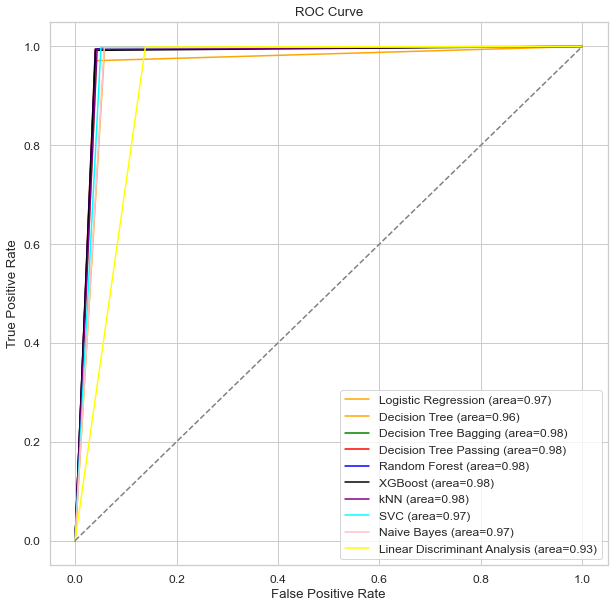

In [100]:
fig = plt.figure(figsize=(10,10))

plt.plot(fpr_log_reg,tpr_log_reg, color='orange', label='Logistic Regression (area=%0.2f)' % auc_log_reg)
plt.plot(fpr_dec_tree,tpr_dec_tree, color='orange', label='Decision Tree (area=%0.2f)' % auc_dec_tree)
plt.plot(fpr_bagging,tpr_bagging, color='green',
         label='Decision Tree Bagging (area=%0.2f)' % auc_bagging)
plt.plot(fpr_passing,tpr_passing, color='red',
         label='Decision Tree Passing (area=%0.2f)' % auc_passing)
plt.plot(fpr_rand_forest,tpr_rand_forest, color='blue',
         label='Random Forest (area=%0.2f)' % auc_rand_forest)
plt.plot(fpr_xgboost,tpr_xgboost, color='black',
         label='XGBoost (area=%0.2f)' % auc_xgboost)
plt.plot(fpr_knn,tpr_knn, color='purple',
         label='kNN (area=%0.2f)' % auc_knn)
plt.plot(fpr_svm,tpr_svm, color='cyan',
         label='SVC (area=%0.2f)' % auc_svm)
plt.plot(fpr_nb,tpr_nb, color='pink',
         label='Naive Bayes (area=%0.2f)' % auc_nb)
plt.plot(fpr_lda,tpr_lda, color='yellow',
         label='Linear Discriminant Analysis (area=%0.2f)' % auc_lda)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Accuracy Results

In [101]:
results = pd.DataFrame()
results['Models'] = ['Logistic Regression', 'Decision Tree', 'Decision Tree Bagging',
                    'Decision Tree Passing', 'Random Forest', 'XGBoost', 'KNN',
                    'SVC', 'Naive Bayes','Linear Discriminat Analysis']
results['Accuracy'] = [auc_log_reg, auc_dec_tree, auc_bagging, auc_passing, auc_rand_forest,
                      auc_xgboost, auc_knn, auc_svm, auc_nb, auc_lda]
results

,Models,Accuracy
0,Logistic Regression,0.969651
1,Decision Tree,0.964448
2,Decision Tree Bagging,0.977316
3,Decision Tree Passing,0.977316
4,Random Forest,0.977010
5,XGBoost,0.975784
6,KNN,0.975477
7,SVC,0.973330
8,Naive Bayes,0.969958
9,Linear Discriminat Analysis,0.930105


### K-fold Cross Validation

LR: 0.966328 (0.006937)
DT: 0.958319 (0.004581)
DTbagging: 0.977602 (0.005766)
DTpassing: 0.975377 (0.005908)
RF: 0.976415 (0.006101)
[09:01:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:01:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:02:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:02:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:02:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:02:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.975377 (0.005319)
KNN: 0.974042 (0.005834)
SVM: 0.970927 (0.006129)
NB: 0.967662 (0.006503)
LDA: 0.924797 (0.007846)


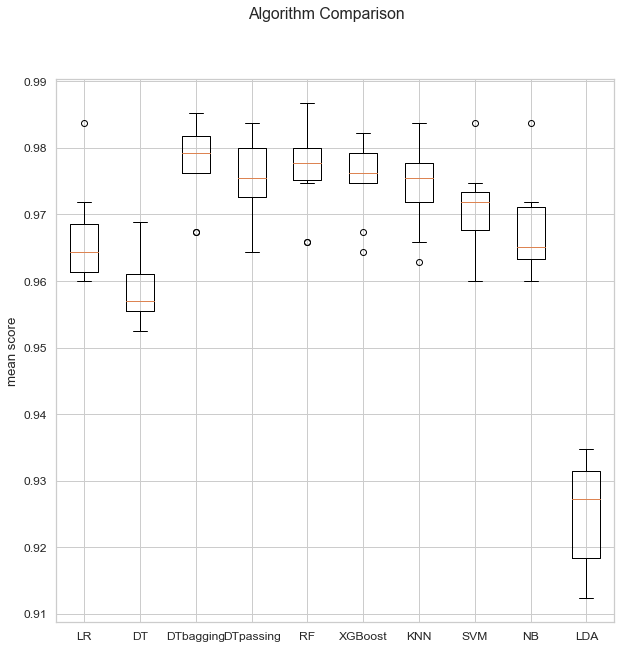

In [102]:
from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', log_reg))
models.append(('DT', dec_tree))
models.append(('DTbagging', bagging))
models.append(('DTpassing', passing))
models.append(('RF', rand_forest))
models.append(('XGBoost', xgboost))
models.append(('KNN', knn))
models.append(('SVM', svm))
models.append(('NB', nb))
models.append(('LDA', lda))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("mean score")
ax.set_xticklabels(names)
plt.show()

The accuracies are very good expect lda.

### Stacking

Stacking is an ensemble technique where a meta-model is built based on models with less performance to increase the overall accuracy. The predicitons of those models are used as an input features of the meta-model to train on and give prediction.

Let's implement stacking to improve the accuracy of our dataset prediction.

In [103]:
X

array([[ 0.95882253, -0.50580861],
       [-0.13877972, -0.05941123],
       [ 1.14033074,  0.42294012],
       ...,
       [-0.15481377,  0.83490109],
       [ 1.00015336,  0.19239478],
       [ 0.81847102, -0.1887236 ]])

In [104]:
# Divide the dataset into training set and hold out set by 50%
train, val_train, test, val_test = train_test_split(X, y, test_size=0.5, random_state=3)

print(len(train))
print(len(val_train))
print(len(test))
print(len(val_test))

5000
5000
5000
5000


In [105]:
# Splitting the training set into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=4)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3500
1500
3500
1500


In [ ]:
Base models: Random Forest, Decision Tree Passing and Decision Tree Bagging.

In [112]:
rand_forest.fit(x_train, y_train)
rand_forest.score(x_test, y_test)

0.978

In [113]:
passing.fit(x_train, y_train)
passing.score(x_test, y_test)

0.9766666666666667

In [118]:
bagging.fit(x_train, y_train)
bagging.score(x_test, y_test)

0.978

In [119]:
# Predictions of all the base models on the validation sets
predict_val1 = rand_forest.predict(val_train)
predict_val2 = passing.predict(val_train)
predict_val3 = bagging.predict(val_train)

In [120]:
# stack predictions for validation set together
predict_val = np.column_stack((predict_val1, predict_val2, predict_val3))
#predict_val

In [121]:
# Prediction of text models on the test set
predict_test1 = rand_forest.predict(x_test)
predict_test2 = passing.predict(x_test)
predict_test3 = bagging.predict(x_test)

In [122]:
# Stacking predicitons for validation
predict_test = np.column_stack((predict_test1, predict_test2, predict_test3))
#predict_test

array([[0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       ...,
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1]])

In [123]:
# Let use the predict_val data for a Random Forest meta-model
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

In [124]:
rand_clf.score(predict_test, y_test)

0.9793333333333333

There is no improvement. let's try hyperparameter tunning.

### Hyperparameters tunning

In [125]:
# Tunning hyperparameters
from sklearn.model_selection import train_test_split, GridSearchCV

grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

grid_search = GridSearchCV(estimator=rand_clf, param_grid=grid_param, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(predict_val, val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=1)

In [126]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 90}

In [127]:
rand_clf2 = RandomForestClassifier(criterion='gini',
                                 max_features='auto',
                                 min_samples_leaf=1,
                                 min_samples_split=7,
                                 n_estimators=90)

In [129]:
rand_clf2.fit(predict_val, val_test)
rand_clf2.score(predict_test, y_test)

0.9793333333333333

There is no improvement too, it seems to be difficult to improve.

In [130]:
# Saving the model for production
import pickle

with open('classificationModel.sav', 'wb') as f:
    pickle.dump(rand_clf2, f)

In [131]:
# Submission
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [132]:
sample_submission["target"] = log_reg.predict(X_test)
sample_submission

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,0
...,...,...
3258,10861,1
3259,10865,1
3260,10868,0
3261,10874,0


In [133]:
sample_submission.to_csv("submission.csv", index=False)